In [66]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import mtcnn
from PIL import Image

# Suppress warnings
import logging
logging.getLogger('tensorflow').disabled = True

# Force GPU mode
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [2]:
!nvidia-smi

Wed Jan 27 18:48:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 460.27.04    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  On   | 00000000:04:00.0 Off |                  N/A |
| 23%   34C    P8     8W / 250W |  10751MiB / 11178MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

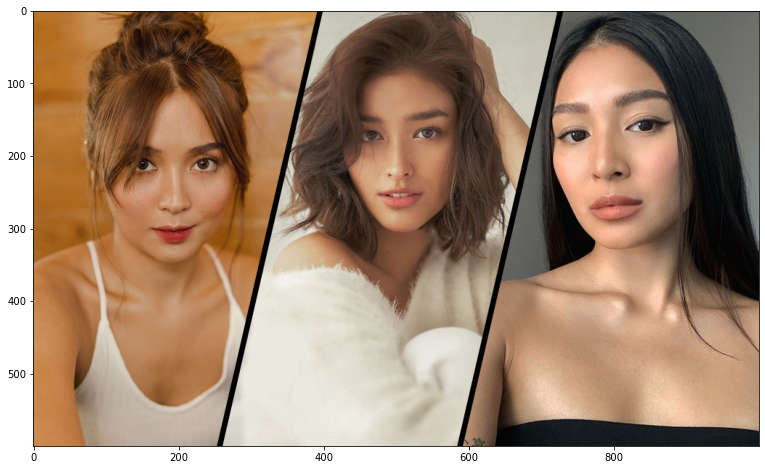

In [68]:
# img = Image.open('../kaggle_3_type_fm/images/maksssksksss0.png')
img = Image.open('celebs.jpg') #../joanna/images/val/

# Convert image into numpy array
img = np.asarray(img)

plt.figure(figsize = (13,10))
plt.imshow(img);

In [69]:
detector = mtcnn.MTCNN()
results = detector.detect_faces(img)

In [70]:
print(results)

[{'box': [427, 76, 162, 229], 'confidence': 0.999903678894043, 'keypoints': {'left_eye': (462, 170), 'right_eye': (544, 166), 'nose': (500, 223), 'mouth_left': (472, 254), 'mouth_right': (538, 251)}}, {'box': [716, 45, 194, 293], 'confidence': 0.9986245632171631, 'keypoints': {'left_eye': (749, 169), 'right_eye': (843, 156), 'nose': (781, 216), 'mouth_left': (769, 277), 'mouth_right': (842, 266)}}, {'box': [109, 115, 167, 238], 'confidence': 0.9699052572250366, 'keypoints': {'left_eye': (150, 214), 'right_eye': (234, 210), 'nose': (196, 269), 'mouth_left': (162, 300), 'mouth_right': (224, 296)}}]


In [6]:
# Set face size to be 160x160 pixels
required_size = (160, 160)

# Extract the actual face pixels from ALL faces
face_list = []
for res in results:
    
    # Bounding box
    x1, y1, width, height = res['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    # Get face
    face = img[y1:y2, x1:x2]

    # Resize face
    face = Image.fromarray(face)
    face = face.resize(required_size)
    
    # Convert image to numpy array
    face = np.asarray(face)
    face_list.append(face)

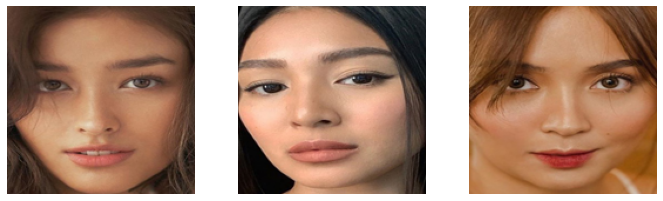

In [7]:
# Show me the faces!
i = 1
plt.figure(figsize = (20,20))
for f in face_list:
    plt.subplot(5, 5, i)
    plt.axis('off')
    plt.imshow(f)
    i += 1
    
plt.show()

In [3]:
from os import listdir
from os.path import isdir

# Set face size to be 160x160 pixels
required_size = (160, 160)

# Create detector
detector = mtcnn.MTCNN()

def create_dataset(directory):
    
    X = []
    Y = []

    # Iterate over train folder
    for subdir in listdir(directory):

        # Define path to a particular subdirectory
        path = directory + subdir + '/'

        # Ignore files that might be in the directory
        if not isdir(path):
            continue

        # Find ALL faces in ALL images in the subdirectory
        faces = []
        # Iterate over all images in subdirectory
        for filename in listdir(path):
            try:
                # Path to image
                file_path = path + filename

                # Get face (WE ONLY GET THE FIRST FACE!)
                img = Image.open(file_path)
                img = img.convert('RGB')
                img = np.asarray(img)
                res = detector.detect_faces(img)[0]

                # Bounding box
                x1, y1, width, height = res['box']
                x1, y1 = abs(x1), abs(y1)
                x2, y2 = x1 + width, y1 + height

                # Get face
                face = img[y1:y2, x1:x2]

                # Resize face
                face = Image.fromarray(face)
                face = face.resize(required_size)
                face = np.asarray(face)

                # store
                faces.append(face)
            except:
                pass

        # Create labels Y
        labels = [subdir for _ in range(len(faces))]

        # Store in list
        X.extend(faces)
        Y.extend(labels)

    # Convert to numpy array and return          
    return np.asarray(X), np.asarray(Y)

In [9]:
# Create Training Set (X,Y)
train_X, train_Y = create_dataset('../joanna/images/train/')

aids


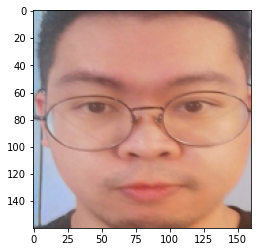

aids


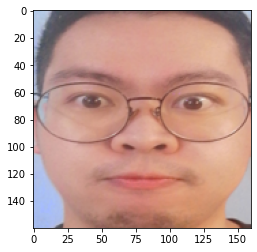

aids


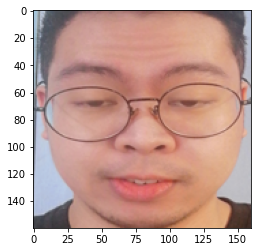

aids


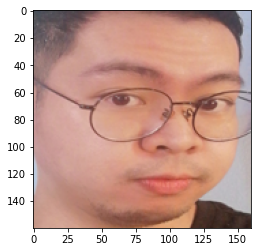

aids


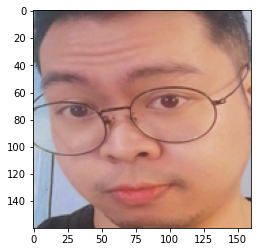

aids


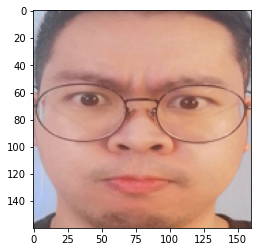

aids


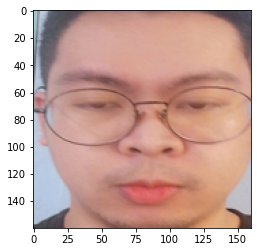

aids


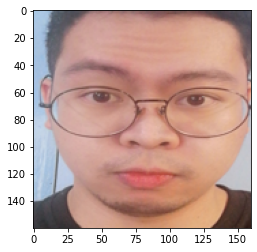

aids


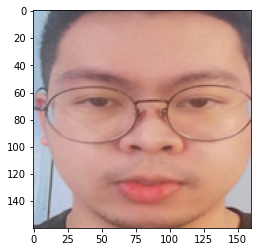

elmer


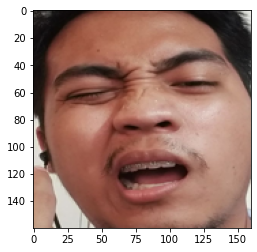

elmer


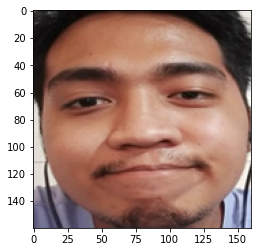

elmer


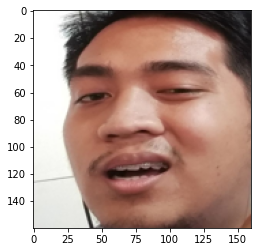

elmer


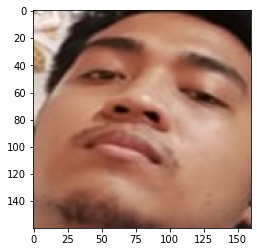

elmer


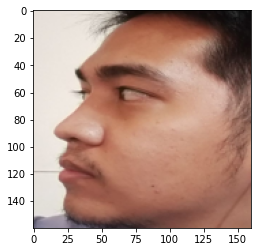

elmer


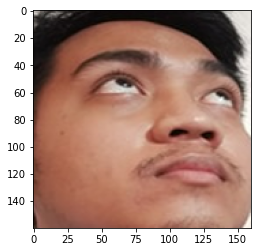

elmer


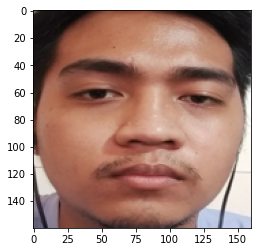

elmer


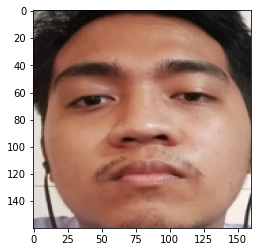

elmer


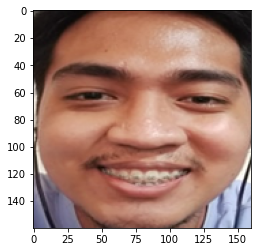

elmer


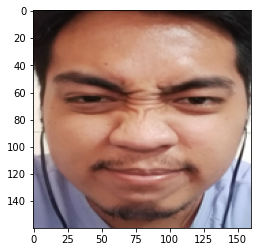

joanna


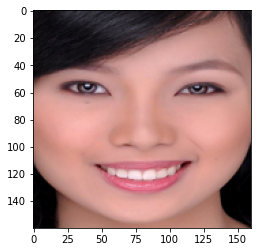

joanna


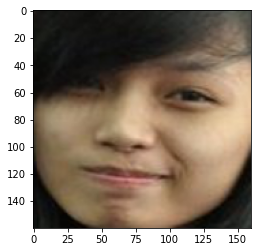

joanna


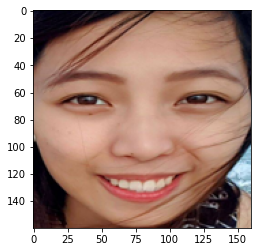

joanna


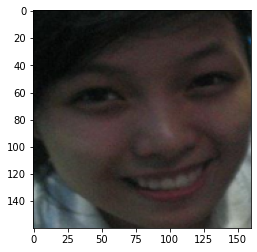

joanna


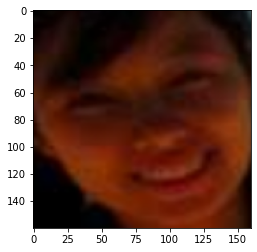

joanna


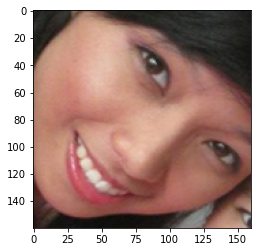

joanna


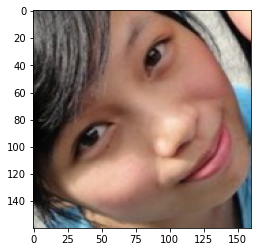

joanna


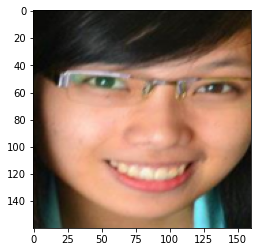

joanna


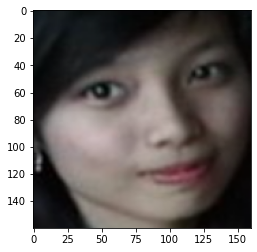

nisarg


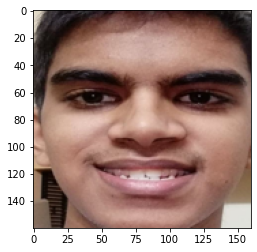

nisarg


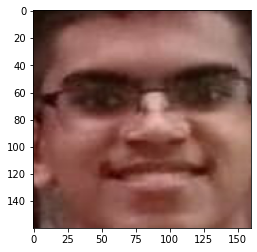

nisarg


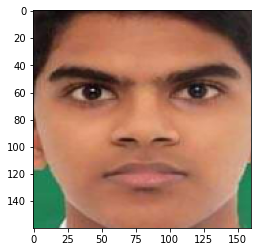

nisarg


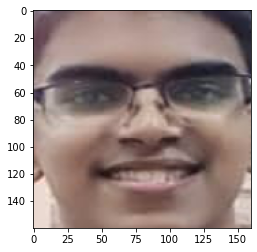

nisarg


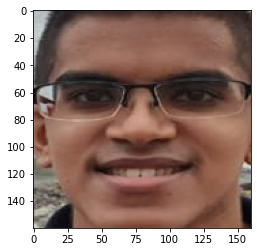

nisarg


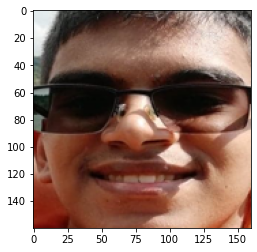

nisarg


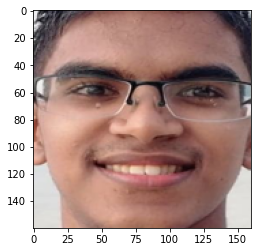

nisarg


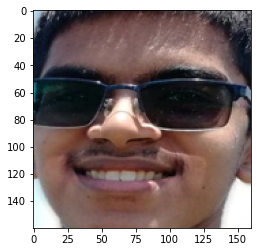

nisarg


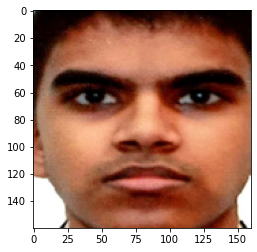

nisarg


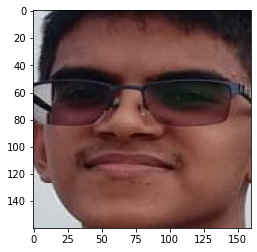

nisarg


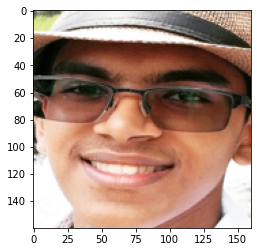

nisarg


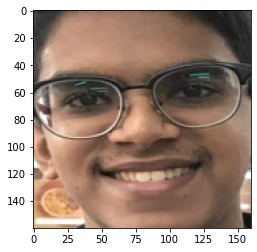

nisarg


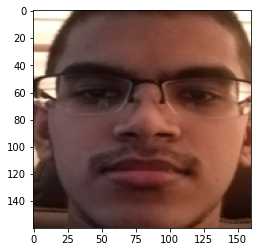

nisarg


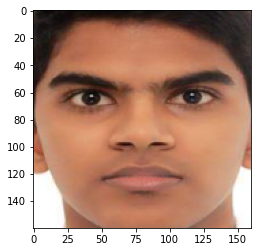

In [10]:
# Check the dataset
for i in range(len(train_Y)):
    print(train_Y[i])
    plt.imshow(train_X[i, :, :])
    plt.show()

In [11]:
# Create Test Set (X,Y)
test_X, test_Y = create_dataset('../joanna/images/val/')

aids


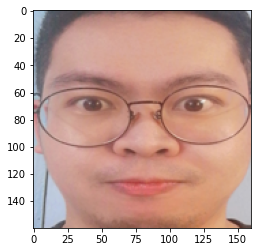

aids


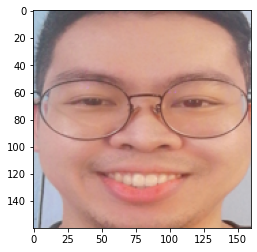

aids


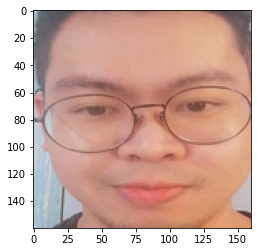

aids


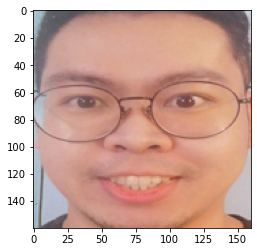

aids


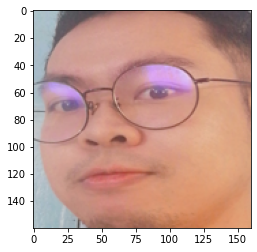

elmer


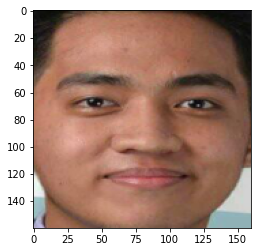

elmer


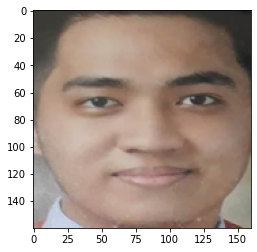

elmer


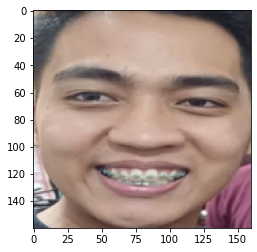

elmer


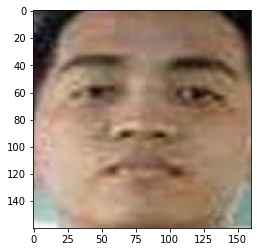

elmer


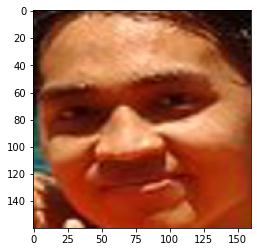

joanna


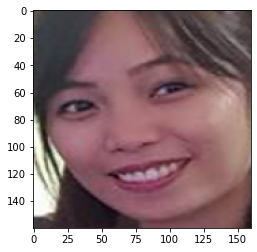

joanna


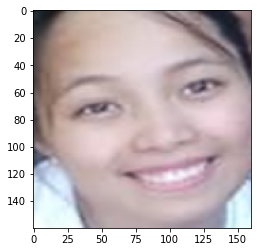

joanna


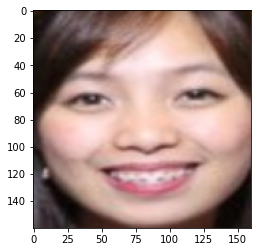

joanna


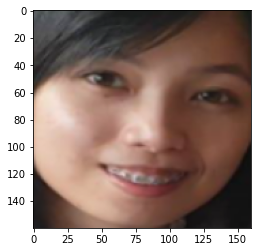

joanna


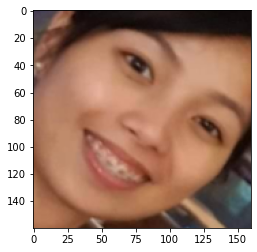

nisarg


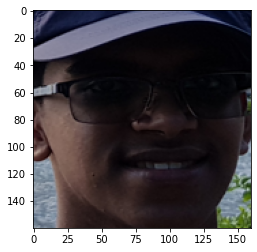

nisarg


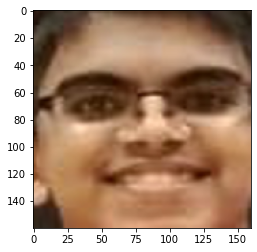

nisarg


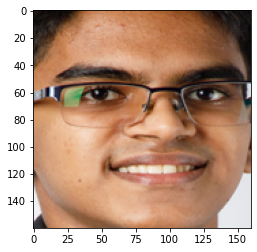

nisarg


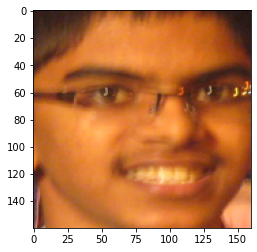

nisarg


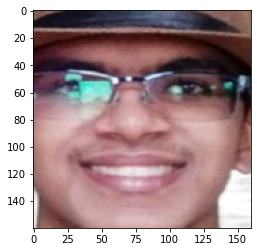

In [12]:
# Check the dataset
for i in range(len(test_Y)):
    print(test_Y[i])
    plt.imshow(test_X[i, :, :])
    plt.show()

In [13]:
np.savez_compressed('lt3.npz', train_X, train_Y, test_X, test_Y)

In [60]:
# Load the faces
data = np.load('lt3.npz')
train_X, train_Y, test_X, test_Y = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

In [61]:
from keras_facenet import FaceNet
embedder = FaceNet()

def create_embedding(face):

    # Convert entries to floats
#     face = face.astype('float32')

#     Standardize pixel values
#     face = (face - face.mean())/face.std()

    # Convert face into a sample of 1 (i.e. batch size = 1)
#     face = np.expand_dims(face, axis = 0)

    # Make prediction to get embedding
    detections = embedder.extract(face, threshold = 0.1)
    
    # Return embedding (flatten it first)
    return detections[0]['embedding']

In [53]:
# Create new dataset of embeddings
# New training set

new_train_X = []
new_train_y = []
for num, face in enumerate(train_X):
    
    try:
        # Create embedding for each face
        embedding = create_embedding(face)

        # Append to NEW training set
        new_train_X.append(embedding)
        new_train_y.append(train_Y[num])
    except:
        pass

# Convert list to numpy array
new_train_X = np.asarray(new_train_X)
new_train_y = np.asarray(new_train_y)

In [20]:
# Create new dataset of embeddings
# New test set

new_test_X = []
new_test_y = []

for num, face in enumerate(test_X):
    
    try:
        # Create embedding for each face
        embedding = create_embedding(face)

        # Append to NEW training set
        new_test_X.append(embedding)
        new_test_y.append(test_Y[num])
    except:
        pass

# Convert list to nump
new_test_y = np.asarray(new_test_y)
new_test_X = np.asarray(new_test_X)

In [60]:
np.savez_compressed('lt3_embeddings.npz', new_train_X, new_train_y, new_test_X, new_test_y)

In [62]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

In [63]:
# load faces
data = np.load('lt3.npz')
test_X_faces = data['arr_2']

# load face embeddings
data = np.load('lt3_embeddings.npz')
train_X, train_Y, test_X, test_Y = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

Accuracy: train = 100.000, test = 100.000


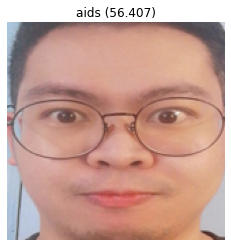

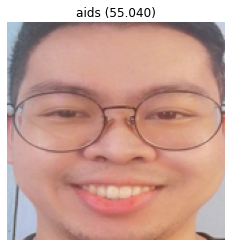

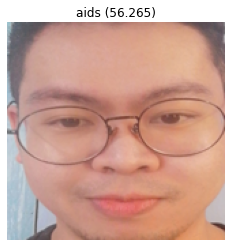

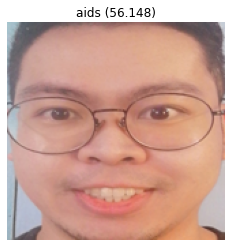

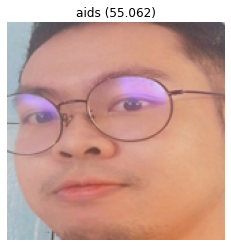

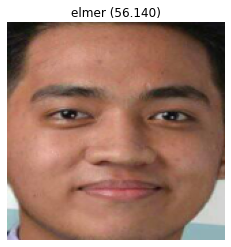

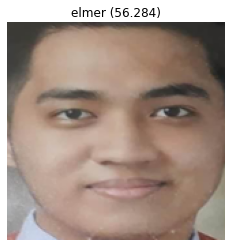

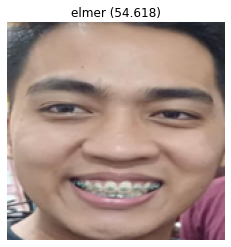

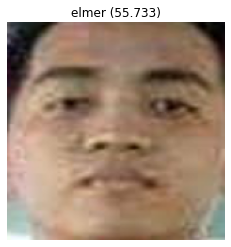

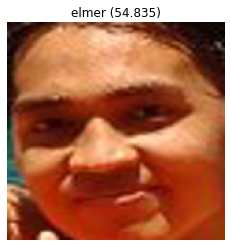

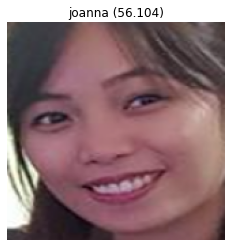

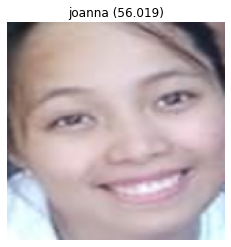

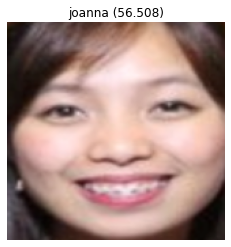

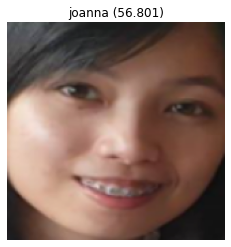

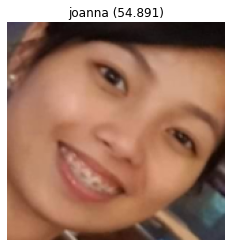

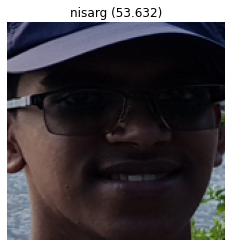

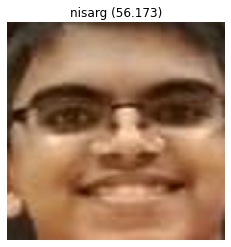

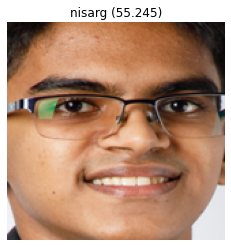

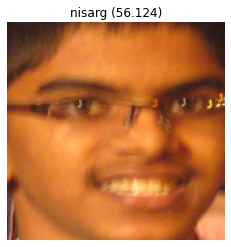

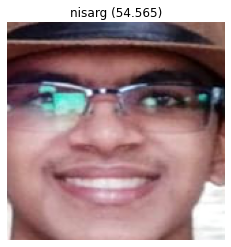

In [64]:
# Normalize input vectors
in_encoder = Normalizer(norm = 'l2')
train_X = in_encoder.transform(train_X)
test_X = in_encoder.transform(test_X)

# Label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(train_Y)
train_Y = out_encoder.transform(train_Y)
test_Y = out_encoder.transform(test_Y)

# Fit model
model = SVC(kernel = 'linear', probability = True)
model.fit(train_X, train_Y)

# Predict
yhat_train = model.predict(train_X)
yhat_test = model.predict(test_X)

# Score
score_train = accuracy_score(train_Y, yhat_train)
score_test = accuracy_score(test_Y, yhat_test)

# Summarize results
print('Accuracy: train = %.3f, test = %.3f' % (score_train*100, score_test*100))

# Show ALL test results
for i in range(test_X.shape[0]):
    
    face = test_X_faces[i]
    face_embedding = test_X[i]
    face_class = test_Y[i]
    face_name = out_encoder.inverse_transform([face_class])
    
    # Predict
    face_embedding = np.expand_dims(face_embedding, axis = 0)
    yhat_class = model.predict(face_embedding)
    yhat_prob = model.decision_function(face_embedding)[0]/sum(model.decision_function(face_embedding)[0])
    
    # Get name
    class_index = yhat_class[0]
    class_probability = yhat_prob[class_index] * 100
    predict_name = out_encoder.inverse_transform(yhat_class)
    
    # Show face
    plt.imshow(face)
    #title = 'Pred: %s (%.3f) + True: %s' % (predict_name[0], class_probability, face_name[0])
    title = '%s (%.3f)' % (predict_name[0], class_probability)
    plt.title(title)
    plt.axis(False)
    plt.show()

In [8]:
import pickle

filename = 'wo_mask.sav'
pickle.dump(model, open(filename, 'wb'))